In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd

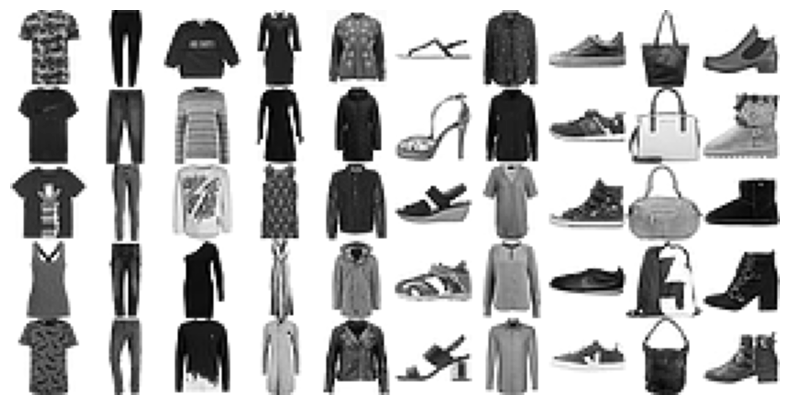

In [2]:
X = np.genfromtxt("hw02_data_points.csv", delimiter = ",") / 255
y = np.genfromtxt("hw02_class_labels.csv", delimiter = ",").astype(int)



i1 = np.hstack((np.reshape(X[np.where(y == 1)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 2)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 3)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 4)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 5)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 6)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 7)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 8)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 9)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 10)[0][0:5], :], (28 * 5, 28))))

fig = plt.figure(figsize = (10, 5))
plt.axis("off")
plt.imshow(i1, cmap = "gray")
plt.show()
fig.savefig("hw02_images.pdf", bbox_inches = "tight")

In [3]:
# STEP 3
# first 60000 data points should be included to train
# remaining 10000 data points should be included to test
# should return X_train, y_train, X_test, and y_test
def train_test_split(X, y):
    # your implementation starts below
    X_train = X[:60000]
    y_train = y[:60000]
    
    X_test = X[60000:]
    y_test = y[60000:]
    # your implementation ends above
    return(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
# STEP 4
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def sigmoid(X, W, w0):
    # your implementation starts below
    scores = np.matmul(X, W) + w0
    #scores = (1 + np.exp(-scores)) ** -1
    scores = (1 + np.exp(-scores - np.max(scores, axis = 1, keepdims = True))) ** -1
    # your implementation ends above
    return(scores)

In [5]:
"""
np.random.seed(421)
D = 784
K = 10
W = np.random.uniform(low = -0.01, high = 0.01, size = (D, K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

scores = sigmoid(X_train, W, w0)
print(scores.shape)
print(scores)

print(np.argmax(scores, axis = 1, keepdims = True))
"""

'\nnp.random.seed(421)\nD = 784\nK = 10\nW = np.random.uniform(low = -0.01, high = 0.01, size = (D, K))\nw0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))\n\nscores = sigmoid(X_train, W, w0)\nprint(scores.shape)\nprint(scores)\n\nprint(np.argmax(scores, axis = 1, keepdims = True))\n'

In [6]:
# STEP 5
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def one_hot_encoding(y):
    # your implementation starts below
    N = y.shape[0]
    K = y.max()
    Y = np.zeros((N, K)).astype(int)
    Y[range(N), y - 1] = 1
    # your implementation ends above
    return(Y)



np.random.seed(421)
D = X_train.shape[1]
K = np.max(y_train)
Y_train = one_hot_encoding(y_train)
W_initial = np.random.uniform(low = -0.001, high = 0.001, size = (D, K))
w0_initial = np.random.uniform(low = -0.001, high = 0.001, size = (1, K))

print(Y_train)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]]


In [7]:
# STEP 6
# assuming that there are D features and K classes
# should return a numpy array with shape (D, K)

def gradient_W(X, Y_truth, Y_predicted):
    # your implementation starts below
    gradient = np.multiply(Y_truth - Y_predicted, Y_predicted ** 2 - Y_predicted)
    gradient = np.matmul(X.T, gradient)
    
    # your implementation ends above
    return(gradient)

# assuming that there are K classes
# should return a numpy array with shape (1, K)
def gradient_w0(Y_truth, Y_predicted):
    # your implementation starts below
    gradient = np.multiply(Y_truth - Y_predicted, Y_predicted ** 2 - Y_predicted)
    gradient = np.sum(gradient, axis = 0)
    gradient = gradient[:, None].T
    
    # your implementation ends above
    return(gradient)

"""
print(X_train.shape)
print(Y_train.shape)
print(Y_predicted.shape)
Y_predicted = sigmoid(X_train, W_initial, w0_initial)
print(gradient_w0(Y_train, Y_predicted).shape)
print(gradient_W(X_train, Y_train, Y_predicted).shape)
"""

'\nprint(X_train.shape)\nprint(Y_train.shape)\nprint(Y_predicted.shape)\nY_predicted = sigmoid(X_train, W_initial, w0_initial)\nprint(gradient_w0(Y_train, Y_predicted).shape)\nprint(gradient_W(X_train, Y_train, Y_predicted).shape)\n'

In [ ]:
# STEP 7
# assuming that there are N data points and K classes
# should return three numpy arrays with shapes (D, K), (1, K), and (250,)
def discrimination_by_regression(X_train, Y_train,
                                 W_initial, w0_initial):
    eta = 0.15 / X_train.shape[0]
    iteration_count = 250

    W = W_initial
    w0 = w0_initial
        
    # your implementation starts below
    objective_values = []
    for i in range(iteration_count):
        Y_predicted = sigmoid(X_train, W, w0)
        
        objective_values = np.append(objective_values, 0.5 * np.sum((Y_train - Y_predicted) ** 2))
        
        W = W - eta * gradient_W(X_train, Y_train, Y_predicted)
        w0 = w0 - eta * gradient_w0(Y_train, Y_predicted)    

    # your implementation ends above
    return(W, w0, objective_values)

W, w0, objective_values = discrimination_by_regression(X_train, Y_train,
                                                       W_initial, w0_initial)
print(W)
print(w0)
print(objective_values[0:10])



fig = plt.figure(figsize = (10, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()
fig.savefig("hw02_iterations.pdf", bbox_inches = "tight")

In [ ]:
# STEP 8
# assuming that there are N data points
# should return a numpy array with shape (N,)
def calculate_predicted_class_labels(X, W, w0):
    # your implementation starts below
    y_predicted = sigmoid(X, W, w0)
    y_predicted = np.argmax(y_predicted, axis = 1) + 1
    # your implementation ends above
    return(y_predicted)

y_hat_train = calculate_predicted_class_labels(X_train, W, w0)
print(y_hat_train)

y_hat_test = calculate_predicted_class_labels(X_test, W, w0)
print(y_hat_test)

In [ ]:
# STEP 9
# assuming that there are K classes
# should return a numpy array with shape (K, K)
def calculate_confusion_matrix(y_truth, y_predicted):
    # your implementation starts below
    confusion_matrix = pd.crosstab(y_predicted, y_truth.T,
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])
    confusion_matrix = confusion_matrix.to_numpy()
    # your implementation ends above
    return(confusion_matrix)

confusion_train = calculate_confusion_matrix(y_train, y_hat_train)
print(confusion_train)

confusion_test = calculate_confusion_matrix(y_test, y_hat_test)
print(confusion_test)